In [17]:
import xlwings as xw

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Open Excel Workbook
wb = xw.Book('shearwall_data.xlsx')  # Replace with your file name
sheet = wb.sheets['SW_info']
ws = sheet 

In [20]:
# Get the last row in column D
last_row = sheet.range('D' + str(sheet.cells.last_cell.row)).end('up').row
# Retrieve the value from the last row of column D
last_row_value = int(sheet.range(f'D{last_row}').value)

print(f"Last Row Number: {last_row}")
print(f"Last Row Value: {last_row_value}")

Last Row Number: 48
Last Row Value: 20


In [21]:
# Calculate the starting row ID (D28 in this case)
start_row = last_row - last_row_value
start_cell_id = f'D{start_row}'
print(f"Start Cell ID: {start_cell_id}")

Start Cell ID: D28


In [22]:
# Initialize a list to store wall dictionaries
walls = []
lengths = []
heights = []
x_list = []
y_list = []

# Run the for loop to extract data starting from D29 for `last_row_value` rows
for row in range(start_row + 1, start_row + 1 + last_row_value):
    wall = {
        'id': sheet.range(f'C{row}').value,
        'length': sheet.range(f'E{row}').value,
        'height': sheet.range(f'F{row}').value,
        'x': sheet.range(f'G{row}').value,
        'y': sheet.range(f'H{row}').value,
    }
    walls.append(wall)
    # Append individual attributes to their respective lists
    lengths.append(wall['length'])
    heights.append(wall['height'])
    x_list.append(wall['x'])
    y_list.append(wall['y'])


# Output the extracted walls data
# print("Extracted Walls Data:")
# Output the individual lists
# print(f"Lengths: {lengths}")
# print(f"Heights: {heights}")
# print(f"X Coordinates: {x_list}")
# print(f"Y Coordinates: {y_list}")

df_walls = pd.DataFrame(walls)
df_walls

,id,length,height,x,y
0,NS1,4.634146,3.2,2.103659,21.458537
1,NS2,6.768293,3.2,9.756098,21.915854
2,NS3,4.085366,3.2,9.756098,14.171951
3,NS4,4.085366,3.2,9.756098,14.171951
4,NS5,7.591463,3.2,12.652439,22.327439
5,NS6,7.621951,3.2,18.902439,22.190244
6,NS7,7.621951,3.2,18.902439,12.739024
7,NS8,7.621951,3.2,25.152439,22.190244
8,NS9,7.621951,3.2,25.457317,12.739024
9,NS10,4.573171,3.2,31.097561,23.562195


In [23]:
# wb = xw.Book('shearwall_data.xlsx')  # Replace with your file name

In [24]:
# This one is for checking at every step 

In [25]:
# last_row = sheet.range('A' + str(sheet.cells.last_cell.row)).end('up').row

In [26]:
# # Open Excel Workbook
# wb = xw.Book('shearwall_data.xlsx')  # Replace with your file name
# sheet = wb.sheets['SW_info']

In [27]:
# Extract East West direction wall data from spreadsheet

In [28]:
# Get the last row in column P
last_row_ew = sheet.range('P' + str(sheet.cells.last_cell.row)).end('up').row

# Retrieve the number of walls from column P
num_walls_ew = int(sheet.range(f'P{last_row_ew}').value)

In [29]:
# Calculate the starting row ID for east-west walls
start_row_ew = last_row_ew - num_walls_ew
start_cell_id_ew = f'P{start_row_ew}'
print(f"Start Cell ID: {start_cell_id_ew}")

Start Cell ID: P28


In [30]:
# Initialize lists for east-west direction walls
walls_ew = []
lengths_ew = []
heights_ew = []
x_list_ew = []
y_list_ew = []

# Run the for loop to extract data for east-west walls
for row in range(start_row_ew + 1, start_row_ew + 1 + num_walls_ew):
    wall_ew = {
        'id': sheet.range(f'O{row}').value,
        'length': sheet.range(f'Q{row}').value,
        'height': sheet.range(f'R{row}').value,
        'x': sheet.range(f'S{row}').value,
        'y': sheet.range(f'T{row}').value,
    }
    walls_ew.append(wall_ew)
    lengths_ew.append(wall_ew['length'])
    heights_ew.append(wall_ew['height'])
    x_list_ew.append(wall_ew['x'])
    y_list_ew.append(wall_ew['y'])



In [31]:
# Combine north-south and east-west wall data for plotting
# (Assuming you have the north-south wall data in walls, x_list, y_list)
walls_combined = walls + walls_ew
x_combined = x_list + x_list_ew
y_combined = y_list + y_list_ew
lengths_combined = lengths + lengths_ew

df_walls_combined =  pd.DataFrame(walls_combined)
df_walls_combined

sheet.range('AC28').value = df_walls_combined

In [32]:
#--------------------------------------------------------------------------------------------------------------
# Calculate Center of Mass for North-South Walls
total_length_ns = sum(lengths)
com_x_ns = sum(length * x for length, x in zip(lengths, x_list)) / total_length_ns
com_y_ns = sum(length * y for length, y in zip(lengths, y_list)) / total_length_ns

# Calculate Center of Mass for East-West Walls
total_length_ew = sum(lengths_ew)
com_x_ew = sum(length * x for length, x in zip(lengths_ew, x_list_ew)) / total_length_ew
com_y_ew = sum(length * y for length, y in zip(lengths_ew, y_list_ew)) / total_length_ew

# # Output results to Excel
# sheet.range('J13').value = f"NS CoM: ({com_x_ns:.2f}, {com_y_ns:.2f})"
# sheet.range('J14').value = f"EW CoM: ({com_x_ew:.2f}, {com_y_ew:.2f})"

# Output results to Excel
sheet.range('J13').value = com_x_ns  # center of mass in x direction
sheet.range('J14').value = com_y_ew  # center of mass in y direction


# Print results for confirmation
print(f"NS Center of Mass: ({com_x_ns:.2f}, {com_y_ns:.2f})")
print(f"EW Center of Mass: ({com_x_ew:.2f}, {com_y_ew:.2f})")

NS Center of Mass: (27.96, 16.30)
EW Center of Mass: (33.07, 16.01)


# Visualization using matplotlib

In [33]:

# Visualization using matplotlib
fig, ax = plt.subplots(figsize=(5, 4))  # Create figure and axis

# Plot north-south walls
for i, (x, y, length) in enumerate(zip(x_list, y_list, lengths)):
    ax.plot([x, x], [y, y + length], label=f"NS Wall {i+1}", color='blue')

# Plot east-west walls
for i, (x, y, length) in enumerate(zip(x_list_ew, y_list_ew, lengths_ew)):
    ax.plot([x, x + length], [y, y], label=f"EW Wall {i+1}", color='red')

# Add the (com_x_ns, com_y_ew) coordinate with a larger dot
ax.scatter(com_x_ns, com_y_ew, color='green', s=100, label='(CoM_x_NS, CoM_y_EW)', zorder=5)

# Formatting the plot
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Shear Wall Layout')
# ax.legend(loc='upper right')
ax.grid(True)
ax.axis('equal')

# Embed the plot in Excel at cell O9
ws.pictures.add(fig, name='ShearWallPlot', update=True, anchor=ws.range("C64"))

# Display the plot (optional, for verification in Python)
plt.show()


In [34]:
# #--------------------------------------------------------------------------------------------------------------

# # Visualization using matplotlib
# plt.figure(figsize=(10, 8))

# # Plot north-south walls
# for i, (x, y, length) in enumerate(zip(x_list, y_list, lengths)):
#     plt.plot([x, x], [y, y + length], label=f"NS Wall {i+1}", color='blue')

# # Plot east-west walls
# for i, (x, y, length) in enumerate(zip(x_list_ew, y_list_ew, lengths_ew)):
#     plt.plot([x, x + length], [y, y], label=f"EW Wall {i+1}", color='red')

# # Add the (com_x_ns, com_y_ew) coordinate with a larger dot
# plt.scatter(com_x_ns, com_y_ew, color='green', s=100, label='(CoM_x_NS, CoM_y_EW)', zorder=5)


# # Formatting the plot
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Shear Wall Layout')
# # plt.legend(loc='upper right')
# plt.grid(True)
# plt.axis('equal')



# # # Save the plot as an image
# # plot_image_path = 'shear_wall_layout.png'
# # plt.savefig(plot_image_path)

# # # Insert the image into the Excel sheet
# # sheet_presentation = wb.sheets.add('Wall Layout')
# # sheet_presentation.pictures.add(plot_image_path, left=50, top=50)  # Adjust left and top for placement

# # # Save the plot as an image
# # plot_image_path = 'shear_wall_layout.png'
# # plt.savefig(plot_image_path)

# # # Insert the image into the Excel sheet at cell O9
# # cell_location = sheet.range('O9')
# # sheet.pictures.add(plot_image_path, left=cell_location.left, top=cell_location.top)

# # Display the plot (optional)
# plt.show()

# ws.pictures.add(fig, name='MyPlot7', update=True, anchor = ws.range("C64"))

# Calculate Center of Mass for North-South Walls

In [35]:

total_length_ns = sum(lengths)
# com_x_ns = sum(length * x for length, x in zip(lengths, x_list)) / total_length_ns
com_y_ns = sum(length * y for length, y in zip(lengths, y_list)) / total_length_ns

# Calculate Center of Mass for East-West Walls
total_length_ew = sum(lengths_ew)
com_x_ew = sum(length * x for length, x in zip(lengths_ew, x_list_ew)) / total_length_ew
# com_y_ew = sum(length * y for length, y in zip(lengths_ew, y_list_ew)) / total_length_ew


# Output results to Excel
sheet.range('J13').value = com_x_ns
sheet.range('J14').value = com_y_ew


# Print results for confirmation
print(f"NS Center of Mass (x): ({com_x_ns:.2f})")
print(f"EW Center of Mass (y): ({com_y_ew:.2f})")


NS Center of Mass (x): (27.96)
EW Center of Mass (y): (16.01)


# Shear force component for East West direction

In [36]:

#----------------------------------------------------------
# Initialize an empty list to store the normalized lengths
normalized_lengths_ew = []

# Loop through each length in the list
for length_ew in lengths_ew:
    # Divide the current length by the total length
    normalized_value_ew = length_ew / total_length_ew
    
    # Append the normalized value to the new list
    normalized_lengths_ew.append(normalized_value_ew)

# Print the result (optional)
print("Normalized Lengths for EW Walls:", normalized_lengths_ew)

# Output results to Excel
sheet.range('V29').options(transpose=True).value = normalized_lengths_ew




Normalized Lengths for EW Walls: [0.08342137183550495, 0.09292953007003953, 0.06162695152013147, 0.07336541847634699, 0.1071135109754666, 0.10466799702625504, 0.09439683843956646, 0.10564620260593967, 0.12667762256915913, 0.03521540086864656, 0.03374809249911962, 0.03179168133975036, 0.049399381774073645]


# Shear force component for North South direction

In [37]:

#----------------------------------------------------------
# Initialize an empty list to store the normalized lengths
normalized_lengths_ns = []

# Loop through each length in the list
for length in lengths:
    # Divide the current length by the total length
    normalized_value = length / total_length_ns
    
    # Append the normalized value to the new list
    normalized_lengths_ns.append(normalized_value)

# Print the result (optional)
print("Normalized Lengths for NS Walls:", normalized_lengths_ns)

# Output results to Excel
sheet.range('J29').options(transpose=True).value = normalized_lengths_ns

Normalized Lengths for NS Walls: [0.03987408184679958, 0.05823714585519413, 0.035152151101783845, 0.035152151101783845, 0.06532004197271774, 0.06558237145855195, 0.06558237145855195, 0.06558237145855195, 0.06558237145855195, 0.039349422875131164, 0.06558237145855195, 0.038037775445960126, 0.06558237145855195, 0.06558237145855195, 0.024921301154249738, 0.05876180482686254, 0.05876180482686254, 0.038824763903462754, 0.024134312696747113, 0.024396642182581328]


# Torsional moment along NS direction

In [38]:

M_tor_ns = []
longest_dimension_ns = sheet.range('J10').value 
for length in lengths:
    M_tor_ns.append(0.1*longest_dimension_ns)

# Output results to Excel
sheet.range('K29').options(transpose=True).value = M_tor_ns

# Torsional moment along EW direction

In [39]:
M_tor_ew = []
longest_dimension_ew = sheet.range('J11').value 
for length_ew in lengths_ew:
    M_tor_ew.append(0.1*longest_dimension_ew)

# Output results to Excel
sheet.range('W29').options(transpose=True).value = M_tor_ew

# Calculate kdx

In [40]:
lengths
x_list

kdx_list = []
for idx,length_ns in enumerate(lengths):
    kdx_list.append(lengths[idx]*x_list[idx])
print(kdx_list)
kdx_list_sum = sum(kdx_list)

x_cr = kdx_list_sum/total_length_ns

print(x_cr)
# Output results to Excel
sheet.range('J16').value = x_cr

d_x_list = []
for idx,length_ns in enumerate(lengths):
    d_x_list.append(abs(x_cr-x_list[idx]))

print(d_x_list)
# Output results to Excel
sheet.range('I29').options(transpose=True).value = d_x_list


kdx_2_list = []
for idx,length_ns in enumerate(lengths):
    kdx_2_list.append(lengths[idx]*d_x_list[idx]**2)
    

print(kdx_2_list)

Jpx = sum(kdx_2_list)
print(Jpx)
# Output results to Excel
sheet.range('J19').value = Jpx

normalized_lengths_ns
V_total_ns_list = []
for idx,length_ns in enumerate(lengths):
    V_total_ns_list.append(normalized_lengths_ns[idx]+(M_tor_ns[idx]*kdx_list[idx])/Jpx)

print(V_total_ns_list)

# Output results to Excel
sheet.range('L29').options(transpose=True).value = V_total_ns_list

[9.748661511005356, 66.03212373587151, 39.85722784057109, 39.85722784057109, 96.05052795954789, 144.07346817370612, 144.07346817370612, 191.71066329565735, 194.0344289113623, 142.21445568114217, 262.58551457465796, 164.42965496728138, 310.2227096966092, 310.2227096966092, 109.49583581201667, 285.2468768590125, 285.2468768590125, 202.91121356335518, 126.133997620464, 125.34391731112436]
27.959948365879253
[25.856289829293885, 18.203850804903645, 18.203850804903645, 18.203850804903645, 15.307509341489009, 9.057509341489009, 9.057509341489009, 2.807509341489009, 2.502631292708518, 3.1376126097305033, 6.491271146315871, 9.23517358534026, 12.74127114631587, 12.74127114631587, 9.844929682901235, 13.808344317047581, 13.808344317047581, 17.009563829242698, 17.009563829242698, 16.247368707291482]
[3098.1479880469465, 2242.878075495013, 1353.8092888123053, 1353.8092888123053, 1778.8305096860838, 625.2932581643344, 625.2932581643344, 60.077048037713794, 47.737525817407835, 45.02109552777375, 321.

# Calculate kdy

In [58]:
lengths_ew
y_list_ew

kdy_list = []
for idx,length_ew in enumerate(lengths_ew):
    kdy_list.append(lengths_ew[idx]*y_list_ew[idx])

print(kdy_list)


[97.76, 109.1426234384295, 72.37879238548483, 86.16522903033908, 137.2006989886972, 134.06826293872697, 120.9120315288519, 131.50654372397386, 86.66716240333136, 5.220107079119572, 5.00260261748959, 4.7125966686496135, 7.322650208209399]


In [59]:
kdy_list_sum = sum(kdy_list)

y_cr = kdy_list_sum/total_length_ew

print(y_cr)

16.011437704528472


In [61]:
# Output results to Excel
sheet.range('J17').value = y_cr

d_y_list = []
for idx,length_ew in enumerate(lengths_ew):
    d_y_list.append(abs(y_cr-y_list_ew[idx]))

print(d_y_list)

[2.788562295471529, 2.830025710105673, 2.830025710105673, 2.830025710105673, 4.537342783276408, 4.537342783276408, 4.537342783276408, 3.958074490593482, 5.03582794843091, 13.633388924040666, 13.633388924040666, 13.633388924040666, 13.633388924040666]


In [62]:




# Output results to Excel
sheet.range('U29').options(transpose=True).value = d_y_list

kdy_2_list = []
for idx,length_ew in enumerate(lengths_ew):
    kdy_2_list.append(lengths_ew[idx]*d_y_list[idx]**2)
    

print(kdy_2_list)

Jpy = sum(kdy_2_list)
print(Jpy)
# Output results to Excel
sheet.range('J20').value = Jpy

normalized_lengths_ew
V_total_ew_list = []
for idx,length_ew in enumerate(lengths_ew):
    V_total_ew_list.append(normalized_lengths_ew[idx]+(M_tor_ew[idx]*kdy_list[idx])/Jpy)

print(V_total_ew_list)

# Output results to Excel
sheet.range('X29').options(transpose=True).value = V_total_ew_list

[40.4356143137723, 46.393861243086356, 30.76645535067832, 36.626732560331334, 137.45908590598046, 134.32075061132338, 121.13974237376362, 103.16867053008416, 200.24776980747708, 408.00576633838847, 391.005526074289, 368.3385390554896, 572.3414222246838]
2590.249936389348
[0.09368706844896221, 0.10439050654114965, 0.06922738854834135, 0.08241355779564447, 0.12152084271618098, 0.11874639425234124, 0.10709371070421429, 0.1194555958194694, 0.13577846949614183, 0.03576355998857293, 0.03427341165571573, 0.032286547211906116, 0.05016832720619258]


# Total V Calculation

In [42]:
M_tor_ns
lengths



[4.634146341463414,
 6.7682926829268295,
 4.085365853658537,
 4.085365853658537,
 7.591463414634147,
 7.621951219512195,
 7.621951219512195,
 7.621951219512195,
 7.621951219512195,
 4.573170731707317,
 7.621951219512195,
 4.420731707317073,
 7.621951219512195,
 7.621951219512195,
 2.8963414634146343,
 6.829268292682927,
 6.829268292682927,
 4.51219512195122,
 2.8048780487804876,
 2.835365853658537]

# Calculate center of rigidity (CoR)

In [43]:
# # Rigidities of walls in NS direction
# rigidities_x = []
# for wall_x in walls_ew:
#     height = wall_x['height']
#     length = wall_x['length']
#     delta = 4 * (height / length)**3 + 3 * (height / length)
#     rigidity_x = 1 / delta
#     rigidities_x.append(rigidity_x)


# print(rigidities_x)

# # Output results to Excel
# # sheet.range('W29').options(transpose=True).value = rigidities_x


In [44]:
# # Rigidities of walls in EW direction
# rigidities_y = []
# for wall_y in walls:
#     height = wall_y['height']
#     length = wall_y['length']
#     delta = 4 * (height / length)**3 + 3 * (height / length)
#     rigidity_y = 1 / delta
#     rigidities_y.append(rigidity_y)


# print(rigidities_y)

# # Output results to Excel
# # sheet.range('K29').options(transpose=True).value = rigidities_y

In [45]:
# # Center of Rigidity along x direction for EW direction walls 
# total_rigidity_x = 0
# weighted_x = 0


# for wall_ew, rigidity_ew in zip(walls_ew, rigidities_x):
#     if rigidity_ew > 0:  # Ensure non-zero rigidity
#         weighted_x += rigidity_ew * wall_ew['x']
#         total_rigidity_x += rigidity_ew if wall_ew['x'] != 0 else 0


# CoR_x = weighted_x / total_rigidity_x if total_rigidity_x != 0 else 0

# print(CoR_x)

In [46]:
# # Center of Rigidity along x direction for EW direction walls 

# total_rigidity_y = 0
# weighted_y = 0

# for wall_ns, rigidity_ns in zip(walls, rigidities_y):
#     if rigidity_ns > 0:  # Ensure non-zero rigidity
#         weighted_y += rigidity_ns * wall_ns['y']
#         total_rigidity_y += rigidity_ns if wall_ns['y'] != 0 else 0

# CoR_y = weighted_y / total_rigidity_y if total_rigidity_y != 0 else 0

# print(CoR_y)

In [47]:
# # Polar moment of inertia along x axis (EW direction walls) calculation
# Jpx = 0
# x_bar_list = []

# for wall_ew, rigidity_ew in zip(walls_ew, rigidities_x):
#     x_bar_ew = wall_ew['x'] - CoR_x
#     x_bar_list.append(x_bar_ew)
#     Jpx += rigidity_ew * (x_bar_ew**2)

# # Output results to Excel
# sheet.range('U29').options(transpose=True).value = x_bar_list
# print(Jpx)

In [48]:
# # Polar moment of inertia along y axis calculation
# Jpy = 0
# y_bar_list = []

# for wall_ns, rigidity_ns in zip(walls, rigidities_y):
#     y_bar_ns = wall_ns['y'] - CoR_y
#     y_bar_list.append(y_bar_ns)
#     Jpy += rigidity_ns * ( y_bar_ns**2)

# sheet.range('I29').options(transpose=True).value = y_bar_list
# print(Jpy)

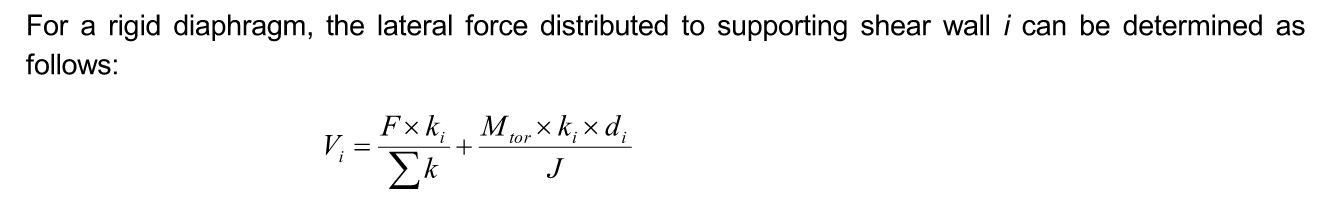

In [49]:
# CoR_x

In [50]:
# CoR_y

In [51]:
# Jp = 0
# x_bar_list = []
# y_bar_list = []
# for wall, rigidity in zip(walls, rigidities):
#     x_bar = wall['x'] - CoR_x
#     x_bar_list.append(x_bar)
#     y_bar = wall['y'] - CoR_y
#     y_bar_list.append(y_bar)
#     Jp += rigidity * (x_bar**2 + y_bar**2)

# # Output results to Excel
# sheet.range('I29').options(transpose=True).value = x_bar_list
# sheet.range('U29').options(transpose=True).value = y_bar_list
# print(Jp)

In [52]:
# e_x_real = CoM[0] - CoR[0]
# e_y_real = CoM[1] - CoR[1]
# e_x_accidental = 0.1 * longest_dimension
# e_y_accidental = 0.1 * longest_dimension

# torsion_effects = []
# for wall, rigidity in zip(walls, rigidities):
#     x_bar = wall['x'] - CoR[0]
#     y_bar = wall['y'] - CoR[1]
#     torsion_force_x = ((e_x_real + e_x_accidental) * rigidity * y_bar) / Jp
#     torsion_force_y = ((e_y_real + e_y_accidental) * rigidity * x_bar) / Jp
#     torsion_effects.append((torsion_force_x, torsion_force_y))